<h1 style = "font-size:3rem;color:orange">Examen primera convocatoria 2024</h1>

Librerías

In [46]:
# Your imports HERE !!!!
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 01 - 1.25pt

- Crear un array de NumPy de dimensiones 5x5, con números enteros aleatorios en el rango [-40, 40]
- Hacer los siguientes reemplazos en orden
    - Reemplazar todos los valores multiplos de 3 por 1
    - Reemplazar todos los valores pares positivos por 0
    - Reemplazar todos los valores pares negativos por Nan
- Averiguar cuantos elementos tienen Nan por fila

In [28]:
# Your solution HERE !!!!
arr = np.random.randint(-40, 41, size=(5, 5))
print(arr)

arr = np.where(arr % 3 == 0, 1, arr)
print()
print(arr)

# Opción 2
# arr[arr % 3 == 0] = 1
# print(arr)

arr = np.where((arr > 0) & (arr % 2 == 0), 0, arr)
print()
print(arr)

# Opción 2
# arr[(arr > 0) & (arr % 2 == 0)] = 0
# print(arr)

arr = np.where((arr < 0) & (arr % 2 == 0), np.nan, arr)
print()
print(arr)

print(f"\nElementos NaN por fila: {np.isnan(arr).sum(axis=1)}")

[[  4 -37 -19 -15   0]
 [ 38 -17 -35 -10   4]
 [-37 -34 -16  -7  19]
 [-20  -7 -18  37 -14]
 [  9  21  30  24  32]]

[[  4 -37 -19   1   1]
 [ 38 -17 -35 -10   4]
 [-37 -34 -16  -7  19]
 [-20  -7   1  37 -14]
 [  1   1   1   1  32]]

[[  0 -37 -19   1   1]
 [  0 -17 -35 -10   0]
 [-37 -34 -16  -7  19]
 [-20  -7   1  37 -14]
 [  1   1   1   1   0]]

[[  0. -37. -19.   1.   1.]
 [  0. -17. -35.  nan   0.]
 [-37.  nan  nan  -7.  19.]
 [ nan  -7.   1.  37.  nan]
 [  1.   1.   1.   1.   0.]]

Elementos NaN por fila: [0 1 2 2 0]


## 02 - 1.25pt

- Escribir un generador que genere todos los factores de un número. Un factor es un número natural que puede dividir exactamente a otro número.

In [29]:
# Your solution HERE !!!!
def factor_generator(number):
    for item in range(1, number + 1):
        if number % item == 0:
            yield item

In [30]:
number = 1000
expected_factors = [1, 2, 4, 5, 8, 10, 20, 25, 40, 50, 100, 125, 200, 250, 500, 1000]
gen = factor_generator(number) # This calls tour function factor_generator
output = [next(gen) for n in range(len(expected_factors))]
assert(expected_factors == output)  # This will fail if the element is not found correctly

## 03 - 1.25pt

- Escribir una función que reciba un Dataframe, en la columna "name" convierta el primer carácter de cada nombre a mayúsculas.

In [43]:
# Your solution HERE !!!!
def capitalize_name(df):
    df['name'] = df['name'].apply(lambda x: x.capitalize())
    return df

# Opción 2
def capitalize_name2(df):
    df['name'] = df['name'].str.capitalize()
    return df

# Opción 3
def capitalize_name3(df):
    df['name'] = df['name'].str.title()
    return df

In [44]:
dataframe = pd.DataFrame({
    'name': ['tamayo','tanjiro','inosuke', 'zenitsu', 'nezuko'],
    'date_of_birth ': ['13/01/2002','18/03/1999','21/11/1998','10/10/2002','05/04/1997'],
    'age': [18.5, 21.2, 22.5, 22, 23]
})

expected_dataframe = pd.DataFrame({
    'name': ['Tamayo', 'Tanjiro', 'Inosuke', 'Zenitsu', 'Nezuko'],
    'date_of_birth ': ['13/01/2002','18/03/1999','21/11/1998','10/10/2002','05/04/1997'],
    'age': [18.5, 21.2, 22.5, 22, 23]
})

output = capitalize_name(dataframe) # This calls your function capitalize_name
assert(expected_dataframe.equals(output)) # This will fail if result is not as expected

## 04 - 1.25pt

- 200 personas hacen una review de una película, dándole una puntuación de 0.0 a 5.0 a dicha película
- Crear una lista aleatoria con las posibles puntuaciones, es decir, 200 puntuaciones entre 0.0 y 5.0
- Discretizar dichas puntuaciones en 4 categorias [muy mala, mala, buena, excelente], los límites de cada categoría son a libre elección
- Discretizar dichas puntuaciones en 5 categorías distribuidas con rangos homogéneos (similar cantidad de valores en cada categoría)
- Mostrar las categorías creadas y cuantos elementos hay en cada una de ellas

In [60]:
# Your solution HERE !!!!
# Lista aleatoria de 200 puntuaciones entre 0.0 y 5.0
review_lst = np.random.randint(0, 51, 200)
review_lst = review_lst / 10
print("Reviews:\n{}\n".format(review_lst))

# Discretización de los valores en distintas categorías
limits = [1, 2.5, 4]
category_lst = ['very_bad', 'bad', 'good', 'supreme']
categories_dct = {category: [] for category in category_lst}

for item in review_lst:
    if item <= limits[0]:
        categories_dct[category_lst[0]].append(item)
    elif item > limits[0] and item <= limits[1]:
        categories_dct[category_lst[1]].append(item)
    elif item > limits[1] and item <= limits[2]:
        categories_dct[category_lst[2]].append(item)
    else:
        categories_dct[category_lst[3]].append(item)

for category, reviews in categories_dct.items():
    print(f"{category}: {reviews}")

# Discretización de los valores en 5 rangos homogéneos
cut_categories = pd.cut(review_lst, 5, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
print("\n{}".format(cut_categories.value_counts()))

# Opción 2
# qcut_categories = pd.cut(review_lst, 5, labels=['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5'])
# print("\n{}".format(qcut_categories.value_counts()))

# Muestra de las categorías creadas
print("\nPrimera categoría:")
for category, reviews in categories_dct.items():
    print(f"{category}: {len(reviews)}")

print("\nSegunda categoría:")
print("{}".format(cut_categories.value_counts()))

Reviews:
[3.  1.  3.5 4.6 1.3 1.7 3.1 3.9 3.7 2.5 3.6 4.3 0.8 2.8 2.5 3.9 0.8 3.4
 4.7 1.3 1.5 2.6 1.4 3.5 4.2 2.  1.9 1.3 1.1 5.  0.5 1.8 4.5 4.7 4.4 4.2
 0.  0.2 3.5 4.8 2.8 4.8 4.7 0.9 2.3 1.6 3.6 3.3 2.4 1.2 3.6 4.5 2.2 4.2
 3.2 0.9 3.4 0.5 1.  5.  2.6 0.2 0.5 2.8 1.3 3.9 0.7 2.9 5.  1.7 0.1 0.4
 2.5 0.7 3.7 4.8 1.6 3.2 4.7 4.6 3.1 4.8 2.2 1.  3.4 3.7 2.6 4.9 2.1 2.5
 4.9 0.  2.2 3.2 2.3 4.1 2.4 2.7 0.  2.4 1.7 2.7 2.5 4.1 3.4 1.6 3.  1.2
 3.8 2.  0.2 0.1 5.  0.6 3.2 1.8 0.9 1.4 2.2 1.8 1.6 4.5 4.4 4.6 2.1 0.2
 1.7 4.9 3.  0.7 4.8 1.9 3.3 2.7 1.4 2.8 3.8 4.8 0.9 2.2 3.5 0.3 0.  3.3
 3.7 3.4 1.4 0.8 4.  3.  0.4 0.6 2.2 2.  4.  2.7 3.  5.  3.8 0.7 3.6 3.8
 3.1 0.2 4.4 2.4 3.9 4.4 3.  0.4 2.6 3.1 4.1 2.1 4.8 4.2 4.7 0.1 2.2 1.3
 2.2 1.1 2.3 3.2 1.4 3.2 4.  4.7 0.  4.7 4.1 0.7 4.1 4.6 3.5 2.2 1.2 3.6
 4.1 2.7]

very_bad: [1.0, 0.8, 0.8, 0.5, 0.0, 0.2, 0.9, 0.9, 0.5, 1.0, 0.2, 0.5, 0.7, 0.1, 0.4, 0.7, 1.0, 0.0, 0.0, 0.2, 0.1, 0.6, 0.9, 0.2, 0.7, 0.9, 0.3, 0.0, 0.8, 0.4, 0.6, 0.7, 0.2, 0

## 05 - 5pt

Se dispone de dos conjuntos de datos, ambos datasets se adjuntan en la pregunta del examen
- [01MIAR_aircraft.csv](https://www.kaggle.com/datasets/dianaddx/aircraft-wildlife-strikes-1990-2023/): incidentes de avión.
- [01MIAR_airports.csv](https://ourairports.com/data/): aeropuertos de todo el mundo, con el nombre y país de cada aeropuerto.

1. Carga el fichero 01MIAR_aircraft.csv en un dataframe de Pandas y:
    - Muestra las seis primeras filas.
    - Calcula el porcentaje de valores nulos por columna.
    - Muestra en una figura, con un tamaño de 8 de ancho y 4 de alto, una gráfica de tipo puntos (scatter), la localización de los incidentes en base a la longitud y latitud.
    > Pista, descarta del df original los registros cuyos valores de latitud y longitud no se encuentren en el rango de coordenadas esféricas, siendo la longitud valida en el rango [-180, 180], y la latitud valida en el rango [-90, 90].
    - Muestra en una figura un conteo de incidentes sobre la columna 'AIRCRAFT' por año, en el gráfico debe aparecer una columna por cada 'DAMAGE_LEVEL' distinto en el dataframe. La gráfica debe ser de tipo linea con diferentes subplots.
    > Pista, agrupa primero y aplique una gráfica de relación.
    
2. Carga el fichero 01MIAR_airports.csv en un dataframe de Pandas y:
    - Muestra el número de filas y columnas
    - Cambia los valores a minúsculas de columna de nombre de aeropuerto en este dataframe y en el del apartado anterior.
    - Con el propósito de disponer del país de los aeropuertos, junta ambos dataframes para obtener un nuevo dataframe con todos los registros de incidentes de avión y los países de los aeropuertos. Como clave, utilizar el nombre del aeropuerto modificado en el anterior apartado.
    - Como resultado se debe disponer un dataframe con 254222 registros.
    - Muestra el número de registros que no disponen de dato en el atributo "iso_country".
    - Elimina todos los registros que que tengan nulos alguna de las columnas 'DAMAGE_LEVEL' y 'iso_country'.
    - Sobre el resultado anterior, crea una tabla contando el número de incidentes por país, en las filas deben aparecer todos los paises posibles y en las columnas debe de estar el tipo de 'DAMAGE_LEVEL'.

,INCIDENT_DATE,AIRPORT,LATITUDE,LONGITUDE,AIRCRAFT,DAMAGE_LEVEL
0,6/22/1996,SACRAMENTO INTL,38.69542,-121.59077,B-737-300,NaN
1,6/26/1996,DENVER INTL AIRPORT,39.85841,-104.66700,B-737-300,NaN
2,7/1/1996,EPPLEY AIRFIELD,41.30252,-95.89417,B-757-200,N
3,7/1/1996,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,A-320,N
4,7/1/1996,LA GUARDIA ARPT,40.77724,-73.87261,A-320,M
5,5/6/1991,SAN ANTONIO INTL,29.53369,-98.46978,B-727-100,N


Columna 1: 0.0%
Columna 2: 0.0%
Columna 3: 12.29%
Columna 4: 12.29%
Columna 5: 0.0%
Columna 6: 35.14%

INCIDENT_DATE        0
AIRPORT              0
LATITUDE             0
LONGITUDE            0
AIRCRAFT             0
DAMAGE_LEVEL     99295
dtype: int64


,INCIDENT_DATE,AIRPORT,LATITUDE,LONGITUDE,AIRCRAFT,DAMAGE_LEVEL
0,6/22/1996,SACRAMENTO INTL,38.69542,-121.59077,B-737-300,NaN
1,6/26/1996,DENVER INTL AIRPORT,39.85841,-104.66700,B-737-300,NaN
2,7/1/1996,EPPLEY AIRFIELD,41.30252,-95.89417,B-757-200,N
3,7/1/1996,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,A-320,N
4,7/1/1996,LA GUARDIA ARPT,40.77724,-73.87261,A-320,M
...,...,...,...,...,...,...
288803,8/28/2023,NASHVILLE INTL,36.12448,-86.67818,UNKNOWN,NaN
288804,8/28/2023,DENVER INTL AIRPORT,39.85841,-104.66700,B-737-8,N
288807,8/28/2023,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,CRJ900,N
288808,8/28/2023,POCATELLO REGIONAL ARPT,42.91131,-112.59586,BE-200 KING,N


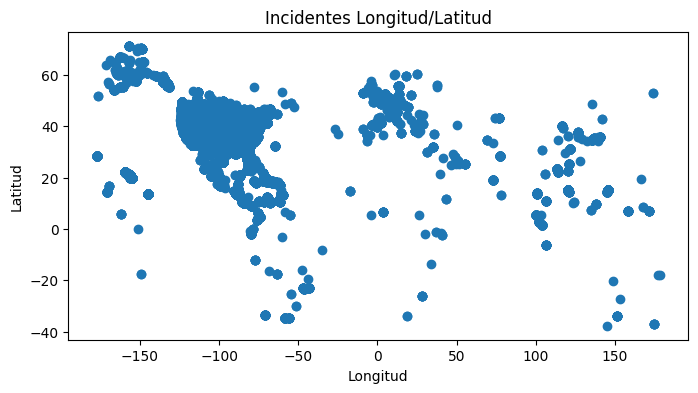

,INCIDENT_DATE,AIRPORT,LATITUDE,LONGITUDE,AIRCRAFT,DAMAGE_LEVEL
2,7/1/1996,EPPLEY AIRFIELD,41.30252,-95.89417,B-757-200,N
3,7/1/1996,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,A-320,N
4,7/1/1996,LA GUARDIA ARPT,40.77724,-73.87261,A-320,M
5,5/6/1991,SAN ANTONIO INTL,29.53369,-98.46978,B-727-100,N
6,11/5/1993,KANSAS CITY INTL,39.29761,-94.71391,BE-1900,M
...,...,...,...,...,...,...
288795,8/28/2023,SOUTHWEST FLORIDA INTL ARPT,26.53617,-81.75517,A-321,N
288798,8/28/2023,SACRAMENTO INTL,38.69542,-121.59077,B-737-8,N
288804,8/28/2023,DENVER INTL AIRPORT,39.85841,-104.66700,B-737-8,N
288807,8/28/2023,DETROIT METRO WAYNE COUNTY ARPT,42.21206,-83.34884,CRJ900,N


,YEAR,AIRCRAFT,DAMAGE_LEVEL
2,1996,B-757-200,N
3,1996,A-320,N
4,1996,A-320,M
5,1991,B-727-100,N
6,1993,BE-1900,M
...,...,...,...
288795,2023,A-321,N
288798,2023,B-737-8,N
288804,2023,B-737-8,N
288807,2023,CRJ900,N


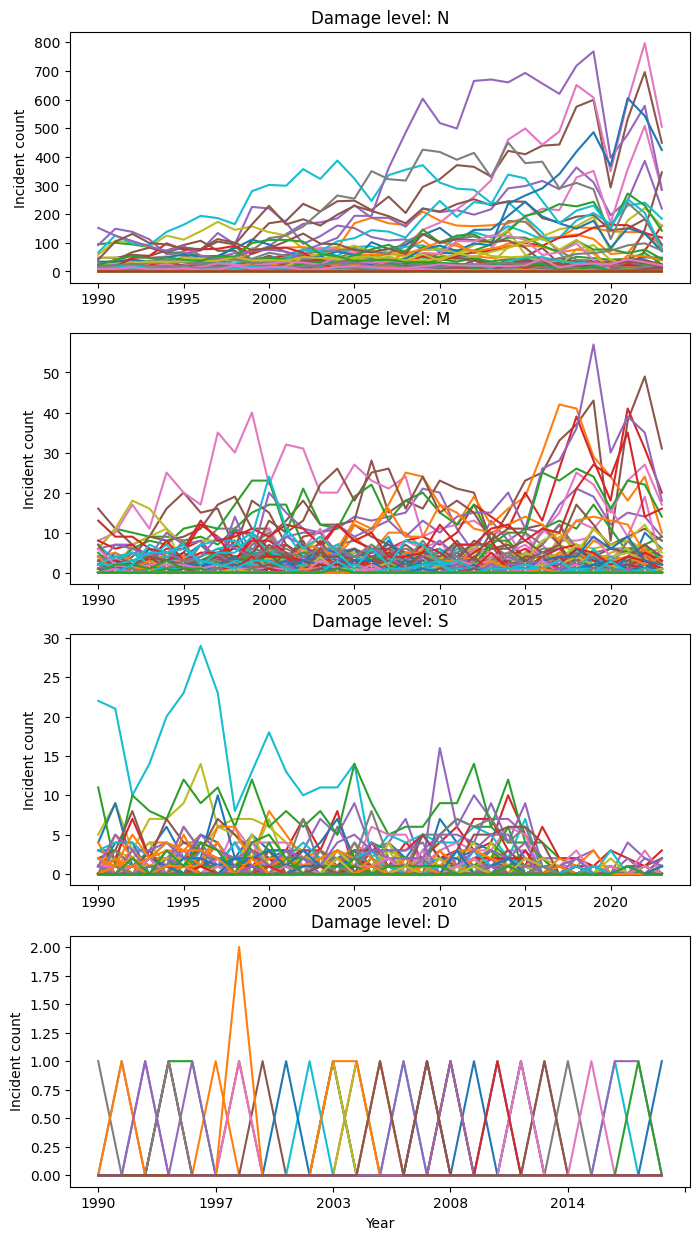

In [121]:
# Your solution HERE !!!!
# Fichero Aircraft
aircraft_rute = os.path.join('01MIAR_aircraft.csv')
data_aircraft = pd.read_csv(aircraft_rute)
display(data_aircraft.head(6))

data_null = data_aircraft.isnull().sum()
i = 1
for item in data_null:
    print(f"Columna {i}: {np.round(item/len(data_aircraft)*100, 2)}%")
    i += 1

data_aircraft.drop(data_aircraft[pd.isnull(data_aircraft['LATITUDE'])].index, inplace=True)
data_aircraft.drop(data_aircraft[pd.isnull(data_aircraft['LONGITUDE'])].index, inplace=True)
print()
print(data_aircraft.isnull().sum())

display(data_aircraft)

mask = (data_aircraft['LATITUDE'] > -90) & (data_aircraft['LATITUDE'] < 90)
data_aircraft = data_aircraft[mask]
mask = (data_aircraft['LONGITUDE'] > -180) & (data_aircraft['LONGITUDE'] < 180)
data_aircraft = data_aircraft[mask]

plt.figure(figsize=(8, 4))
plt.scatter(data_aircraft['LONGITUDE'], data_aircraft['LATITUDE'])
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Incidentes Longitud/Latitud')
plt.show()

data_aircraft.drop(data_aircraft[pd.isnull(data_aircraft['DAMAGE_LEVEL'])].index, inplace=True)
display(data_aircraft)
data_aircraft['YEAR'] = data_aircraft['INCIDENT_DATE'].str[-4:]
data_aircraft_clean = data_aircraft[['YEAR', 'AIRCRAFT', 'DAMAGE_LEVEL']]
display(data_aircraft_clean)

damage_levels = data_aircraft_clean['DAMAGE_LEVEL'].unique()
fig, axis = plt.subplots(len(damage_levels), 1, figsize=(8, 15))
for i, damage_level in enumerate(damage_levels):
    df_damage_level = data_aircraft_clean[data_aircraft_clean['DAMAGE_LEVEL'] == damage_level]
    incident_counts = df_damage_level.groupby(['YEAR', 'AIRCRAFT']).size().unstack(fill_value=0)

    incident_counts.plot(ax=axis[i])
    axis[i].set_title(f"Damage level: {damage_level}")
    axis[i].set_ylabel("Incident count")
    axis[i].set_xlabel(" ")
    axis[i].legend_.remove()

plt.xlabel('Year')
plt.show()

# sns.lmplot(data=data_aircraft_clean, x='YEAR', y='AIRCRAFT', hue='DAMAGE_LEVEL')

In [120]:
# Fichero Airports
airports_rute = os.path.join('01MIAR_airports.csv')
data_airports = pd.read_csv(airports_rute)
print("Dimensión:", data_airports.shape)

data_airports['name'] = data_airports['name'].str.lower()
display(data_airports)

data_aircraft['AIRPORT'] = data_aircraft['AIRPORT'].str.lower()
display(data_aircraft)

data_airports.rename(columns={'name': 'AIRPORT'}, inplace=True)
data_airport_country = pd.merge(data_aircraft, data_airports, on='AIRPORT', how='left')
display(data_airport_country)

print("\nRegistros NaN en 'iso_country':", data_airport_country['iso_country'].isnull().sum())

data_airport_country.drop(data_airport_country[pd.isnull(data_airport_country['DAMAGE_LEVEL'])].index, inplace=True)
data_airport_country.drop(data_airport_country[pd.isnull(data_airport_country['iso_country'])].index, inplace=True)
display(data_airport_country)

table = data_airport_country.groupby(['iso_country', 'DAMAGE_LEVEL']).count()
table = table.loc[:, :'INCIDENT_DATE']
table.rename(columns={'INCIDENT_DATE': 'INCIDENTS'}, inplace=True)
display(table)

Dimensión: (77458, 18)


,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,total rf heliport,40.070985,-74.933689,11.0,NaN,US,US-PA,Bensalem,no,K00A,NaN,00A,https://www.penndot.pa.gov/TravelInPA/airports...,NaN,NaN
1,323361,00AA,small_airport,aero b ranch airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,lowell field,59.947733,-151.692524,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,epps airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,506791,00AN,small_airport,katmai lodge airport,59.093287,-156.456699,80.0,NaN,US,US-AK,King Salmon,no,00AN,NaN,00AN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77453,46378,ZZ-0001,heliport,sealand helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
77454,307326,ZZ-0002,small_airport,glorioso islands airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
77455,346788,ZZ-0003,small_airport,fainting goat airport,32.110587,-97.356312,690.0,NaN,US,US-TX,Blum,no,87TX,NaN,87TX,NaN,NaN,NaN
77456,342102,ZZZW,closed,scandium city heliport,69.355287,-138.939310,4.0,NaN,CA,CA-YT,(Old) Scandium City,no,NaN,NaN,NaN,NaN,NaN,"ZZZW, ZZZW, ZYW, YK96"


,INCIDENT_DATE,AIRPORT,LATITUDE,LONGITUDE,AIRCRAFT,DAMAGE_LEVEL,YEAR
2,7/1/1996,eppley airfield,41.30252,-95.89417,B-757-200,N,1996
3,7/1/1996,washington dulles intl arpt,38.94453,-77.45581,A-320,N,1996
4,7/1/1996,la guardia arpt,40.77724,-73.87261,A-320,M,1996
5,5/6/1991,san antonio intl,29.53369,-98.46978,B-727-100,N,1991
6,11/5/1993,kansas city intl,39.29761,-94.71391,BE-1900,M,1993
...,...,...,...,...,...,...,...
288795,8/28/2023,southwest florida intl arpt,26.53617,-81.75517,A-321,N,2023
288798,8/28/2023,sacramento intl,38.69542,-121.59077,B-737-8,N,2023
288804,8/28/2023,denver intl airport,39.85841,-104.66700,B-737-8,N,2023
288807,8/28/2023,detroit metro wayne county arpt,42.21206,-83.34884,CRJ900,N,2023


,INCIDENT_DATE,AIRPORT,LATITUDE,LONGITUDE,AIRCRAFT,DAMAGE_LEVEL,YEAR,id,ident,type,...,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,7/1/1996,eppley airfield,41.30252,-95.89417,B-757-200,N,1996,3751.0,KOMA,large_airport,...,US,US-NE,Omaha,yes,KOMA,OMA,OMA,NaN,https://en.wikipedia.org/wiki/Eppley_Airfield,NaN
1,7/1/1996,washington dulles intl arpt,38.94453,-77.45581,A-320,N,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7/1/1996,la guardia arpt,40.77724,-73.87261,A-320,M,1996,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5/6/1991,san antonio intl,29.53369,-98.46978,B-727-100,N,1991,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/5/1993,kansas city intl,39.29761,-94.71391,BE-1900,M,1993,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154818,8/28/2023,southwest florida intl arpt,26.53617,-81.75517,A-321,N,2023,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154819,8/28/2023,sacramento intl,38.69542,-121.59077,B-737-8,N,2023,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154820,8/28/2023,denver intl airport,39.85841,-104.66700,B-737-8,N,2023,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154821,8/28/2023,detroit metro wayne county arpt,42.21206,-83.34884,CRJ900,N,2023,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Registros NaN en 'iso_country': 149429


,INCIDENT_DATE,AIRPORT,LATITUDE,LONGITUDE,AIRCRAFT,DAMAGE_LEVEL,YEAR,id,ident,type,...,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,7/1/1996,eppley airfield,41.302520,-95.894170,B-757-200,N,1996,3751.0,KOMA,large_airport,...,US,US-NE,Omaha,yes,KOMA,OMA,OMA,NaN,https://en.wikipedia.org/wiki/Eppley_Airfield,NaN
29,9/19/1993,manchester airport,42.934520,-71.437060,BE-33,S,1993,2398.0,EGCC,large_airport,...,GB,GB-ENG,Manchester,yes,EGCC,MAN,NaN,http://www.manchesterairport.co.uk/,https://en.wikipedia.org/wiki/Manchester_Airport,"Ringway Airport, RAF Ringway"
87,10/26/1990,cape cod gateway airport,41.669340,-70.280360,C-402,M,1990,3600.0,KHYA,medium_airport,...,US,US-MA,Hyannis,yes,KHYA,HYA,HYA,NaN,https://en.wikipedia.org/wiki/Barnstable_Munic...,"Barnstable, Boardman Polando"
114,5/12/1990,eppley airfield,41.302520,-95.894170,B-727-200,N,1990,3751.0,KOMA,large_airport,...,US,US-NE,Omaha,yes,KOMA,OMA,OMA,NaN,https://en.wikipedia.org/wiki/Eppley_Airfield,NaN
153,7/11/1990,eppley airfield,41.302520,-95.894170,DC-9-30,N,1990,3751.0,KOMA,large_airport,...,US,US-NE,Omaha,yes,KOMA,OMA,OMA,NaN,https://en.wikipedia.org/wiki/Eppley_Airfield,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154717,8/25/2023,eppley airfield,41.302520,-95.894170,B-737-800,N,2023,3751.0,KOMA,large_airport,...,US,US-NE,Omaha,yes,KOMA,OMA,OMA,NaN,https://en.wikipedia.org/wiki/Eppley_Airfield,NaN
154748,4/18/2023,boise air terminal/gowen field,43.564440,-116.222780,B-737,N,2023,3421.0,KBOI,medium_airport,...,US,US-ID,Boise,yes,KBOI,BOI,BOI,http://www.cityofboise.org/departments/airport/,https://en.wikipedia.org/wiki/Boise_Airport,"Boise Air Terminal, Gowen Field"
154751,8/10/2023,charlevoix municipal airport,45.304861,-85.275306,BN-2A ISLAND,N,2023,19570.0,KCVX,small_airport,...,US,US-MI,Charlevoix,no,KCVX,NaN,CVX,NaN,NaN,NaN
154781,8/23/2023,harry reid international airport,36.080360,-115.152330,B-737-8,N,2023,3631.0,KLAS,large_airport,...,US,US-NV,Las Vegas,yes,KLAS,LAS,LAS,https://www.harryreidairport.com/,https://en.wikipedia.org/wiki/Harry_Reid_Inter...,McCarran International Airport


INCIDENTS
iso_country DAMAGE_LEVEL           
BR          N                     1
BZ          N                     1
CA          M                     6
            N                     4
            S                     1
DM          N                     1
ES          M                     1
            N                     7
FM          N                     7
GB          M                    14
            N                   315
            S                     3
GY          M                     6
            N                     4
            S                     1
IE          N                     2
IN          N                     1
IT          N                     1
MX          N                     1
PT          N                     1
SA          N                     1
SG          N                    51
            S                     1
TR          N                     1
UM          M                    12
            N                    73
US          D                     8
            M                   634
            N                  4051
            S                   182
VC          M                     1
VI          N                     1